

### Introduction to Additional Approaches

Given the limitations of the clustering-based methodology, which primarily relies on visual interpretations and does not provide a precise quantification of the ESG-ROE relationship, we extend our analysis by incorporating more advanced statistical and machine learning approaches. To move beyond the purely descriptive perspective, we implement multiple regression (OLS), LASSO regression, and Random Forest models to assess the impact of ESG variables on corporate profitability in a more structured and predictive manner. Additionally, we employ SHAP (SHapley Additive Explanations) to interpret the relative importance of each explanatory variable, allowing for a more nuanced understanding of the interactions between ESG scores and financial performance. These models are applied at three levels: a global analysis to identify overarching trends, a sectoral analysis to capture industry-specific dynamics, and a geographical analysis to explore regional variations. By leveraging these complementary approaches, our goal is to provide a more robust and interpretable assessment of the ESG-profitability relationship while addressing the methodological gaps observed in previous studies.

Importation des bibliothèques

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import shap

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)




ModuleNotFoundError: No module named 'statsmodels'

Analyse Exploraoire des données

In [3]:
data=pd.read_csv("df_2024_with_variables.csv", sep="\t")
data

,name,grade,country,industry,employees,roe,Year,roe_num,global_industry,continent,...,smallArms,furLeather,gambling,gmo,militaryContract,nuclear,pesticides,palmOil,coal,tobacco
0,"1-800-FLOWERS.COM, Inc.",22.6,United States of America,Retailing,"4,000",-2.07%,2024,-2.07,Consumer sectors (B2C),North America,...,False,False,False,False,False,False,False,False,False,False
1,1&1 AG,27.7,Germany,Telecommunication Services,"3,280",4.34%,2024,4.34,Technology sectors,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"10X Genomics, Inc.",22.5,United States of America,Pharmaceuticals,"1,259",-24.87%,2024,-24.87,Healthcare and well-being,North America,...,False,False,False,False,False,False,False,False,False,False
3,1st Source Corp.,35.0,United States of America,Banks,"1,170",12.01%,2024,12.01,Financial sectors,North America,...,False,False,False,False,False,False,False,False,False,False
4,"4D Molecular Therapeutics, Inc.",35.1,United States of America,Pharmaceuticals,201,-32.50%,2024,-32.50,Healthcare and well-being,North America,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,"The Hain Celestial Group, Inc.",27.7,United States of America,Food Products,"2,786",-8.67%,2024,-8.67,Consumer sectors (B2C),North America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2169,"The Hanover Insurance Group, Inc.",22.1,United States of America,Insurance,"4,800",14.63%,2024,14.63,Financial sectors,North America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2170,"The Hartford Financial Services Group, Inc.",16.8,United States of America,Insurance,"18,700",19.74%,2024,19.74,Financial sectors,North America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2171,The Hershey Co.,25.0,United States of America,Food Products,"18,650",43.41%,2024,43.41,Consumer sectors (B2C),North America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On part d'une base de données de 2173 observations et 43 variables à laquelle on enlèvera les lignes ou les variables les plus importantes sont manquantes(totalEsg, environmentScore, socialScore,governanceScore) et les colonnes ou les valeurs sont totalement manquantes.

In [7]:
#Vérification des valeurs manquantes
data.isnull().mean() *100

,0
name,0.000000
grade,0.000000
country,0.000000
industry,0.000000
employees,0.000000
roe,0.000000
Year,0.000000
roe_num,0.000000
global_industry,7.685228
continent,0.000000


In [8]:
df_cleaned = data.dropna(subset=["environmentScore", "socialScore", "governanceScore","global_industry"])

In [9]:
df_cleaned.isnull().mean() *100

,0
name,0.000000
grade,0.000000
country,0.000000
industry,0.000000
employees,0.000000
roe,0.000000
Year,0.000000
roe_num,0.000000
global_industry,0.000000
continent,0.000000


In [10]:
data_cleaned=df_cleaned.drop(columns=["peerCount","peerGroup","peerEsgScorePerformance","percentile","environmentPercentile","socialPercentile","governancePercentile","catholic"])

In [11]:
data_cleaned.shape

(305, 35)

On est donc passé à 305  observations et 36 variables.

Analyse des données

In [12]:
# Vérifier la distribution des secteurs
sector_counts = data_cleaned['global_industry'].value_counts()

In [13]:
sector_counts

,count
global_industry,
Technology sectors,59
Consumer sectors (B2C),56
Industrial and manufacturing sectors,39
Healthcare and well-being,33
Financial sectors,28
Real estate and related services,27
Energy and natural resources,19
Utilities,18
Commercial services and media,14


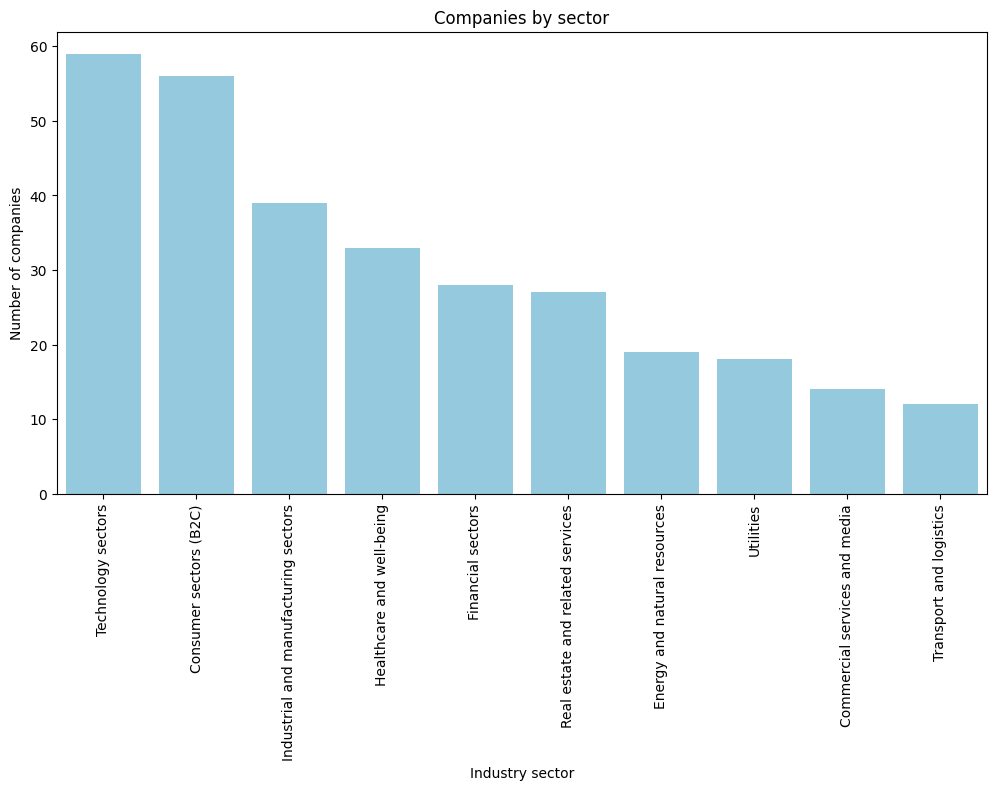

In [14]:
# Afficher un graphique de répartition des secteurs
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_counts.index, y=sector_counts.values, color="skyblue")
plt.xlabel("Industry sector")
plt.ylabel("Number of companies")
plt.title("Companies by sector")
plt.xticks(rotation=90)
plt.show()


In [15]:
companies_by_country = data_cleaned.groupby("country")["name"].apply(list)

# Afficher les entreprises par pays
for country, companies in companies_by_country.items():
    print(f"Pays : {country}")
    print(f"Entreprises : {', '.join(companies)}\n")

Pays : Austria
Entreprises : Erste Group Bank AG

Pays : Belgium
Entreprises : Ackermans & van Haaren NV, Azelis Group NV, Bekaert SA

Pays : Bermuda
Entreprises : Assured Guaranty Ltd.

Pays : Canada
Entreprises : Advantage Energy Ltd., Allied Properties Real Estate Investment Trust, ATCO Ltd., Badger Infrastructure Solutions Ltd., Birchcliff Energy Ltd., Eldorado Gold Corp., Equinox Gold Corp., Ero Copper Corp., Foran Mining Corp.

Pays : China
Entreprises : A-Living Smart City Services Co., Ltd., AIM Vaccine Co., Ltd., Anhui Golden Seed Winery Co., Ltd., Anhui Heli Co., Ltd., Anhui Huaheng Biotechnology Co., Ltd., Anhui Yingjia Distillery Co., Ltd., Anhui Yingliu Electromechanical Co., Ltd., Anhui Zhongding Sealing Parts Co., Ltd., Aotecar New Energy Technology Co., Ltd., Apeloa Pharmaceutical Co., Ltd., Asia-Potash International Investment (Guangzhou) Co., Ltd., ASR Microelectronics Co., Ltd., Asymchem Laboratories (Tianjin) Co., Ltd., AVIC Industry-Finance Holdings Co., Ltd., Baos

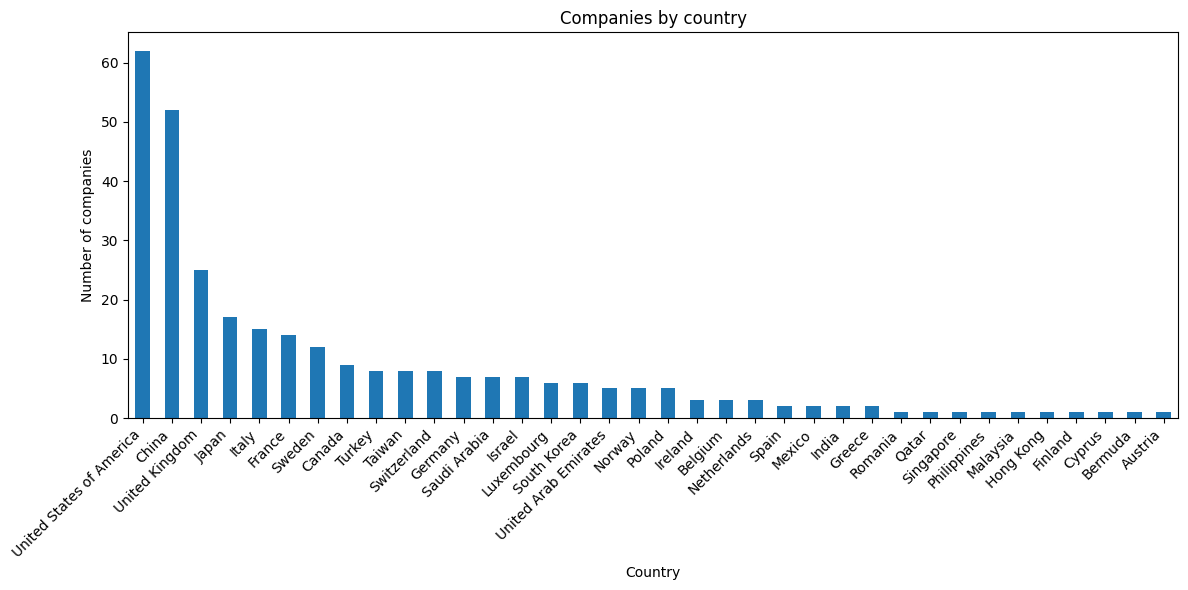

In [16]:


# Vérifier si les colonnes nécessaires existent
if 'country' in data_cleaned.columns and 'name' in data_cleaned.columns:
    # Grouper les entreprises par pays et compter le nombre d'entreprises
    companies_by_country = data_cleaned.groupby("country")["name"].count()


    companies_by_country = companies_by_country.sort_values(ascending=False)


    plt.figure(figsize=(12, 6))
    companies_by_country.plot(kind="bar")
    plt.title("Companies by country")
    plt.xlabel("Country")
    plt.ylabel("Number of companies")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Les colonnes 'country' et/ou 'name' sont absentes du fichier. Veuillez vérifier vos données.")


In [17]:
# Filtrer les entreprises des États-Unis, Japon, Chine et Europe
countries_of_interest = ["United States of America", "Japan", "China"]
european_countries = [
    "France", "Germany", "United Kingdom", "Italy", "Spain", "Netherlands", "Sweden", "Switzerland",
    "Belgium", "Austria", "Denmark", "Finland", "Norway", "Ireland", "Portugal", "Greece", "Poland",
    "Czech Republic", "Hungary", "Slovakia", "Slovenia", "Luxembourg", "Estonia", "Latvia", "Lithuania",
    "Bulgaria", "Romania", "Croatia"
]
countries_of_interest.extend(european_countries)

filtered_companies = data_cleaned[data_cleaned['country'].isin(countries_of_interest)]



En selectionnant les entreprises qui viennent des états-unis, du japon, de la  chine et du continent européen, notre nouvelle base de données contient 244 variables et 36 variables

In [18]:
filtered_companies.shape

(244, 35)

In [19]:
data_final=filtered_companies.copy()

In [20]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 2 to 815
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  244 non-null    object 
 1   grade                 244 non-null    float64
 2   country               244 non-null    object 
 3   industry              244 non-null    object 
 4   employees             244 non-null    object 
 5   roe                   244 non-null    object 
 6   Year                  244 non-null    int64  
 7   roe_num               244 non-null    float64
 8   global_industry       244 non-null    object 
 9   continent             244 non-null    object 
 10  Ticker                244 non-null    object 
 11  maxAge                244 non-null    float64
 12  totalEsg              244 non-null    float64
 13  environmentScore      244 non-null    float64
 14  socialScore           244 non-null    float64
 15  governanceScore       244 no

In [21]:
import pandas as pd

# Vérifier le nombre total de doublons dans le DataFrame
nb_doublons = data_final.duplicated().sum()

print(f"Nombre total de doublons dans le DataFrame : {nb_doublons}")


Nombre total de doublons dans le DataFrame : 0


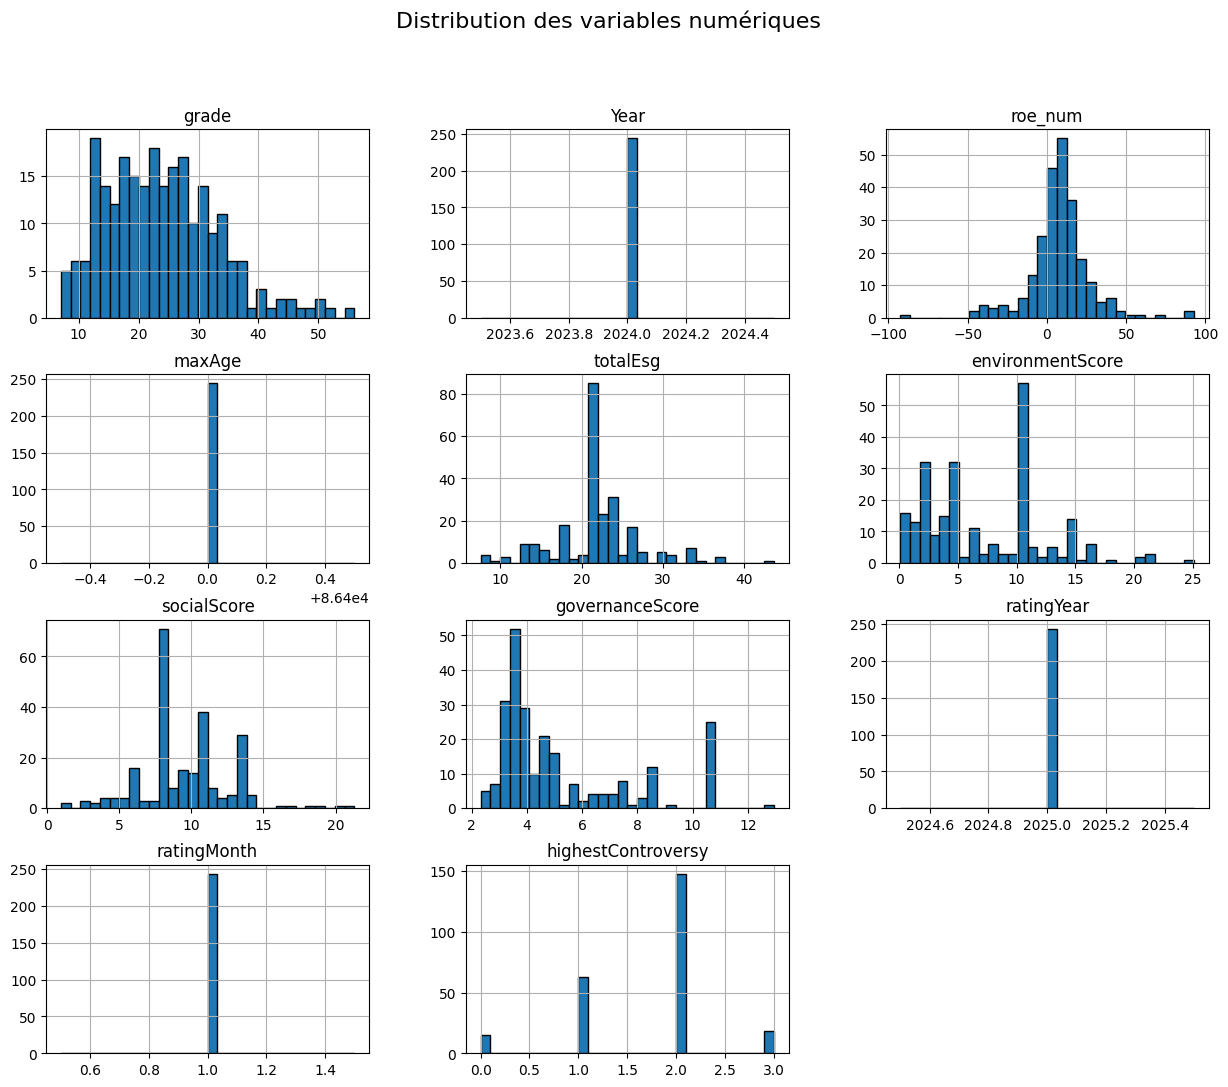

In [22]:
# Afficher la distribution de toutes les variables numériques
numeric_columns = data_final.select_dtypes(include=['number'])
numeric_columns.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.show()

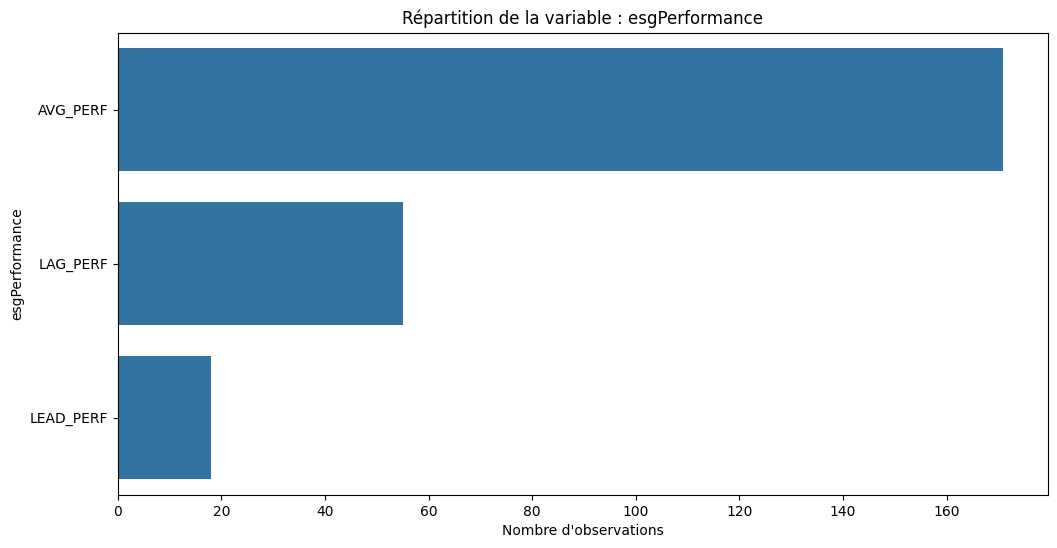

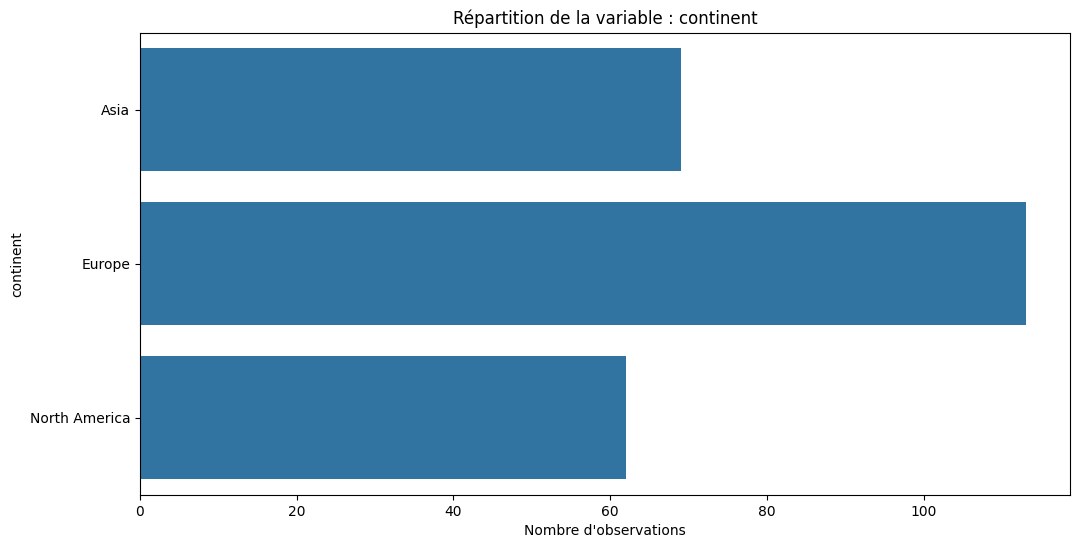

In [23]:
for column in ["esgPerformance", "continent"]:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=data_final[column], order=data_cleaned[column].value_counts().index)
    plt.title(f"Répartition de la variable : {column}")
    plt.xlabel("Nombre d'observations")
    plt.ylabel(column)
    plt.show()

In [24]:
data_final.columns

Index(['name', 'grade', 'country', 'industry', 'employees', 'roe', 'Year',
       'roe_num', 'global_industry', 'continent', 'Ticker', 'maxAge',
       'totalEsg', 'environmentScore', 'socialScore', 'governanceScore',
       'ratingYear', 'ratingMonth', 'highestControversy', 'esgPerformance',
       'relatedControversy', 'adult', 'alcoholic', 'animalTesting',
       'controversialWeapons', 'smallArms', 'furLeather', 'gambling', 'gmo',
       'militaryContract', 'nuclear', 'pesticides', 'palmOil', 'coal',
       'tobacco'],
      dtype='object')

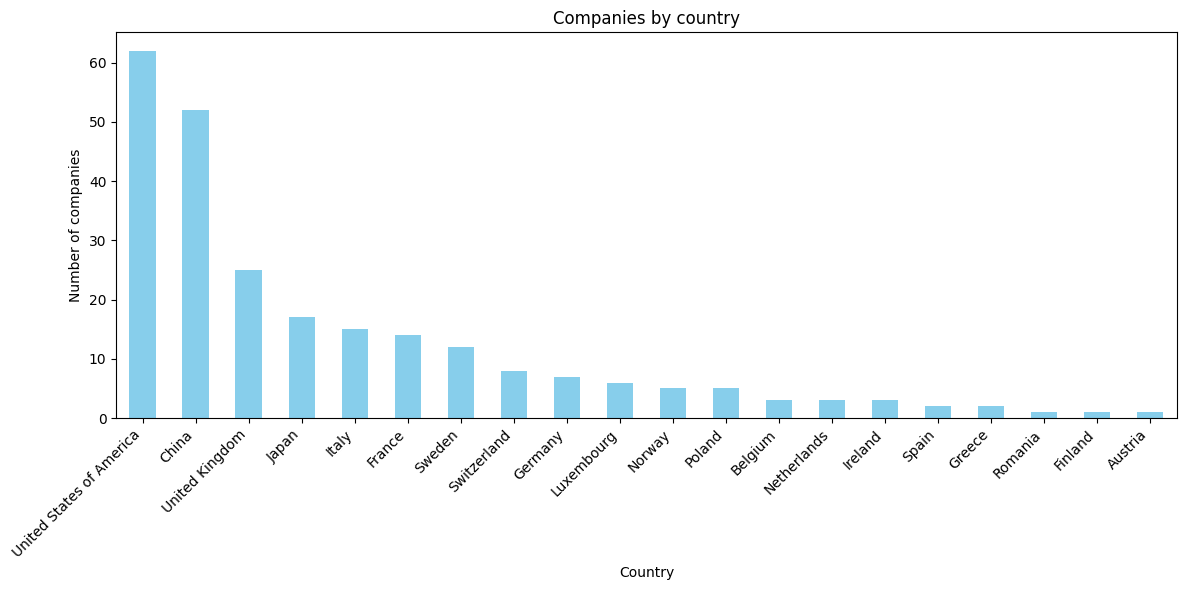

In [25]:
# Vérifier si les colonnes nécessaires existent
if 'country' in data_final.columns and 'name' in data_final.columns:
    # Grouper les entreprises par pays et compter le nombre d'entreprises
    companies_by_country = data_final.groupby("country")["name"].count()


    companies_by_country = companies_by_country.sort_values(ascending=False)


    plt.figure(figsize=(12, 6))
    companies_by_country.plot(kind="bar", color="skyblue")
    plt.title("Companies by country")
    plt.xlabel("Country")
    plt.ylabel("Number of companies")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Les colonnes 'country' et/ou 'name' sont absentes du fichier. Veuillez vérifier vos données.")

In [26]:
# Appliquer le One Hot Encoding sur les variables catégorielles
categorical_features = ['esgPerformance','esgPerformance','alcoholic', 'animalTesting',
       'controversialWeapons', 'smallArms', 'furLeather', 'gambling', 'gmo',
       'militaryContract', 'nuclear', 'pesticides', 'palmOil', 'coal',
       'tobacco']
data_final = pd.get_dummies(data_final, columns=categorical_features, drop_first=True,dtype=int)

In [27]:
data_final.shape

(244, 29)

In [28]:
data_final.columns

Index(['name', 'grade', 'country', 'industry', 'employees', 'roe', 'Year',
       'roe_num', 'global_industry', 'continent', 'Ticker', 'maxAge',
       'totalEsg', 'environmentScore', 'socialScore', 'governanceScore',
       'ratingYear', 'ratingMonth', 'highestControversy', 'relatedControversy',
       'adult', 'esgPerformance_LAG_PERF', 'esgPerformance_LEAD_PERF',
       'esgPerformance_LAG_PERF', 'esgPerformance_LEAD_PERF',
       'animalTesting_True', 'gambling_True', 'gmo_True', 'nuclear_True'],
      dtype='object')

Modélisation

In [29]:
# Sélection des features
feature_cols = ['environmentScore', 'socialScore', 'governanceScore',
                'highestControversy', 'totalEsg',
                'esgPerformance_LAG_PERF', 'esgPerformance_LEAD_PERF',
                'animalTesting_True', 'nuclear_True']


X = data_final[feature_cols]
X = sm.add_constant(X)


X = X.loc[:, ~X.columns.duplicated()]


y = data_final["roe_num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, y_train = X_train.align(y_train, join='inner', axis=0)
X_test, y_test = X_test.align(y_test, join='inner', axis=0)


print(X_train.info())


<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 772 to 369
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     195 non-null    float64
 1   environmentScore          195 non-null    float64
 2   socialScore               195 non-null    float64
 3   governanceScore           195 non-null    float64
 4   highestControversy        195 non-null    float64
 5   totalEsg                  195 non-null    float64
 6   esgPerformance_LAG_PERF   195 non-null    int64  
 7   esgPerformance_LEAD_PERF  195 non-null    int64  
 8   animalTesting_True        195 non-null    int64  
 9   nuclear_True              195 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 16.8 KB
None


In [30]:
# Régression multiple
model = sm.OLS(y_train, X_train).fit()
print("\nRégression multiple:")
print(model.summary())


Régression multiple:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.5246
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.856
Time:                        15:29:44   Log-Likelihood:                -852.72
No. Observations:                 195   AIC:                             1725.
Df Residuals:                     185   BIC:                             1758.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
co

In [31]:
 # Modèles de Machine Learning
lasso = Lasso(alpha=0.1).fit(X_train, y_train)




Coefficients du modèle LASSO
const                       0.000000
environmentScore            0.358100
socialScore                 0.174639
governanceScore            -0.175292
highestControversy          0.150324
totalEsg                    0.019660
esgPerformance_LAG_PERF     6.658821
esgPerformance_LEAD_PERF    0.000000
animalTesting_True         -0.253148
nuclear_True               -3.073195
dtype: float64


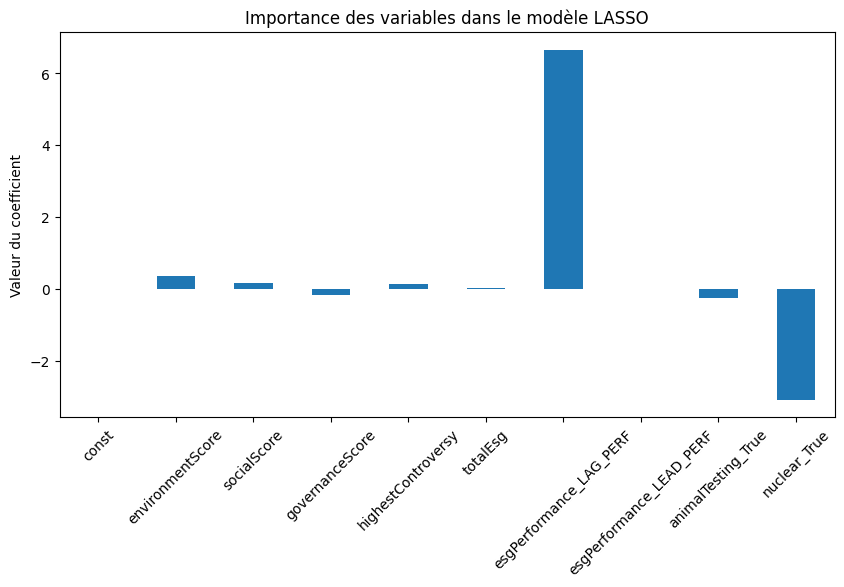

In [32]:
# Affichage des coefficients LASSO
lasso_coeffs = pd.Series(lasso.coef_, index=X_train.columns)
print(f"\nCoefficients du modèle LASSO")
print(lasso_coeffs)


plt.figure(figsize=(10, 5))
lasso_coeffs.plot(kind='bar')
plt.title(f"Importance des variables dans le modèle LASSO")
plt.ylabel("Valeur du coefficient")
plt.xticks(rotation=45)
plt.show()

In [33]:

rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)


Importance des variables dans le modèle Random Forest
const                       0.000000
environmentScore            0.148721
socialScore                 0.256152
governanceScore             0.140597
highestControversy          0.083257
totalEsg                    0.348749
esgPerformance_LAG_PERF     0.003255
esgPerformance_LEAD_PERF    0.000708
animalTesting_True          0.014532
nuclear_True                0.004029
dtype: float64


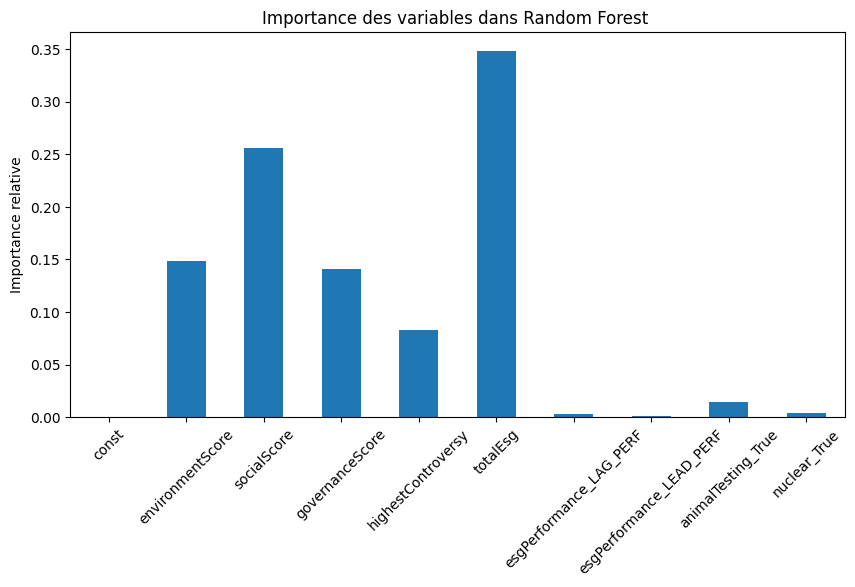

In [34]:
  # Importance des variables dans Random Forest
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
print(f"\nImportance des variables dans le modèle Random Forest")
print(rf_importances)


plt.figure(figsize=(10, 5))
rf_importances.plot(kind='bar')
plt.title(f"Importance des variables dans Random Forest ")
plt.ylabel("Importance relative")
plt.xticks(rotation=45)
plt.show()

In [35]:
 # Prédictions et MSE
mse_results = {
        "LASSO": mean_squared_error(y_test, lasso.predict(X_test)),
        "Random Forest": mean_squared_error(y_test, rf.predict(X_test))
    }

In [36]:
print("\nMSE pour chaque modèle:")
for model_name, mse in mse_results.items():
  print(f"{model_name}: {mse}")


MSE pour chaque modèle:
LASSO: 385.4188105112849
Random Forest: 411.98304625246925


In [37]:
from sklearn.metrics import r2_score

r2_results = {
    "LASSO": r2_score(y_test, lasso.predict(X_test)),
    "Random Forest": r2_score(y_test, rf.predict(X_test))
}

print(r2_results)


{'LASSO': -0.0255036693141395, 'Random Forest': -0.09618449879667645}


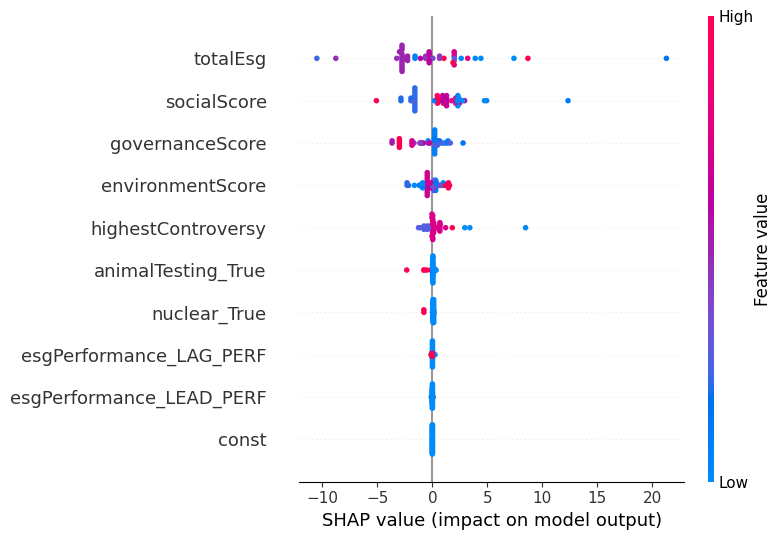

In [38]:
 # Explicabilité avec SHAP
explainer = shap.Explainer(rf)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [39]:
# Supprimer les colonnes dupliquées
data_final = data_final.loc[:, ~data_final.columns.duplicated()]


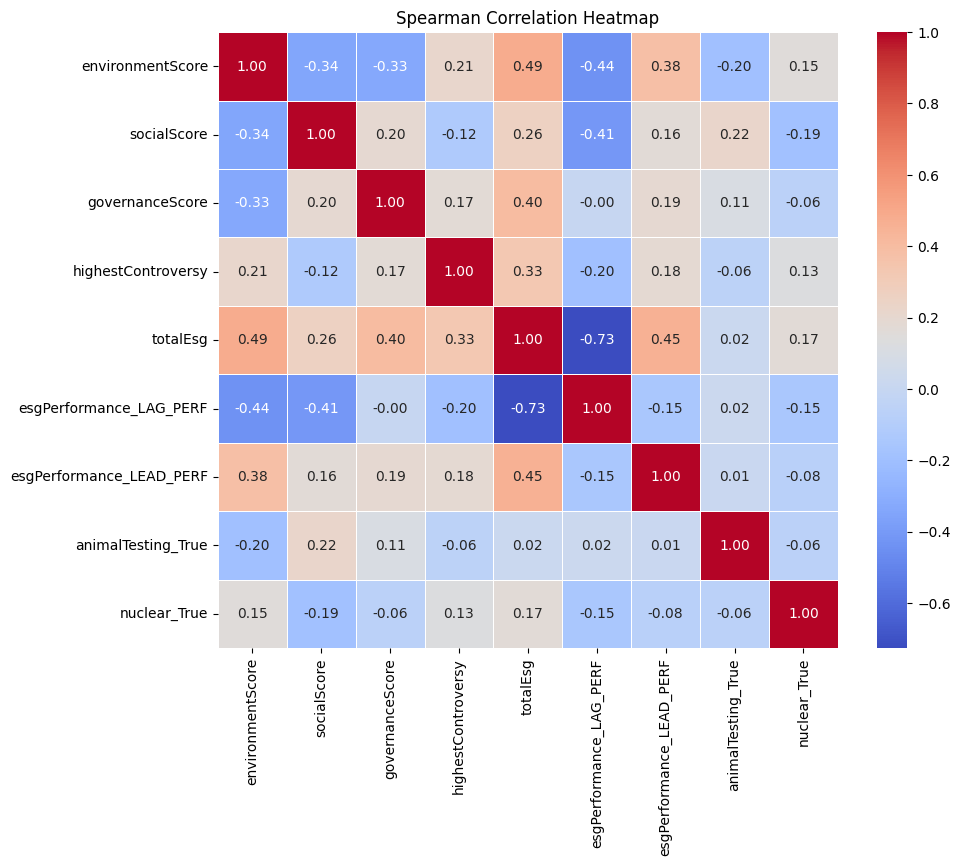

In [40]:
# Matrice de corrélation

import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = data_final[feature_cols].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()


## Analyse par secteurs

In [41]:
#Nouvelle sélection de variables
feature_cols = ['environmentScore', 'socialScore', 'governanceScore',
                'highestControversy'
                ]


Régression multiple pour le secteur Healthcare and well-being:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.8914
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.487
Time:                        15:29:45   Log-Likelihood:                -109.18
No. Observations:                  25   AIC:                             228.4
Df Residuals:                      20   BIC:                             234.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

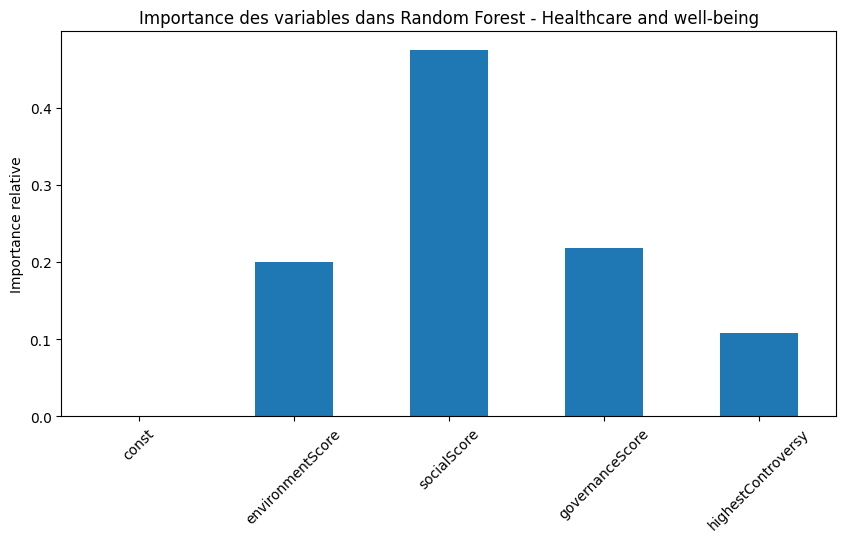

In [42]:

sector = data_final["global_industry"].unique()[0]
df_sector = data_final[data_final["global_industry"] == sector]


X_sector = df_sector[feature_cols]
X_sector = sm.add_constant(X_sector)


X_sector = X_sector.loc[:, ~X_sector.columns.duplicated()]


y_sector = df_sector["roe_num"]


if len(X_sector) > 10:

    X_train, X_test, y_train, y_test = train_test_split(X_sector, y_sector, test_size=0.2, random_state=42)


    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)

    if X_train.empty or y_train.empty:
        print(f"Aucune donnée suffisante pour le secteur {sector}. Skipping...")
    else:
        # Régression multiple
        model = sm.OLS(y_train, X_train).fit()
        print(f"\nRégression multiple pour le secteur {sector}:")
        print(model.summary())

        # LASSO
        lasso = Lasso(alpha=0.1, max_iter=10000).fit(X_train, y_train)
        print(f"\nCoefficients du modèle LASSO pour le secteur {sector}:")
        print(pd.Series(lasso.coef_, index=X_train.columns))

        # Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
        print(f"\nImportance des variables dans Random Forest pour le secteur {sector}:")
        print(rf_importances)

        # Visualisation des importances des variables
        plt.figure(figsize=(10, 5))
        rf_importances.plot(kind='bar')
        plt.title(f"Importance des variables dans Random Forest - {sector}")
        plt.ylabel("Importance relative")
        plt.xticks(rotation=45)
        plt.show()
else:
    print(f"Pas assez de données pour effectuer l'analyse sur le secteur {sector}.")



Régression multiple pour le secteur Commercial services and media:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     10.78
Date:                Wed, 05 Feb 2025   Prob (F-statistic):             0.0204
Time:                        15:29:46   Log-Likelihood:                -26.131
No. Observations:                   9   AIC:                             62.26
Df Residuals:                       4   BIC:                             63.25
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


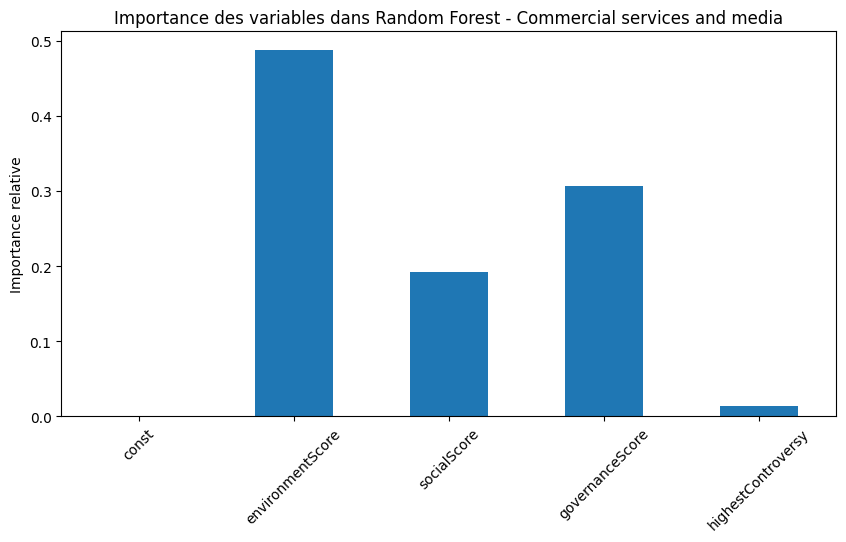

In [43]:

sector = data_final["global_industry"].unique()[1]
df_sector = data_final[data_final["global_industry"] == sector]

X_sector = df_sector[feature_cols]
X_sector = sm.add_constant(X_sector)


X_sector = X_sector.loc[:, ~X_sector.columns.duplicated()]

y_sector = df_sector["roe_num"]


if len(X_sector) > 10:

    X_train, X_test, y_train, y_test = train_test_split(X_sector, y_sector, test_size=0.2, random_state=42)


    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)

    if X_train.empty or y_train.empty:
        print(f"Aucune donnée suffisante pour le secteur {sector}. Skipping...")
    else:
        # Régression multiple
        model = sm.OLS(y_train, X_train).fit()
        print(f"\nRégression multiple pour le secteur {sector}:")
        print(model.summary())

        # LASSO
        lasso = Lasso(alpha=0.1, max_iter=10000).fit(X_train, y_train)
        print(f"\nCoefficients du modèle LASSO pour le secteur {sector}:")
        print(pd.Series(lasso.coef_, index=X_train.columns))

        # Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
        print(f"\nImportance des variables dans Random Forest pour le secteur {sector}:")
        print(rf_importances)

        # Visualisation des importances des variables
        plt.figure(figsize=(10, 5))
        rf_importances.plot(kind='bar')
        plt.title(f"Importance des variables dans Random Forest - {sector}")
        plt.ylabel("Importance relative")
        plt.xticks(rotation=45)
        plt.show()
else:
    print(f"Pas assez de données pour effectuer l'analyse sur le secteur {sector}.")



Régression multiple pour le secteur Real estate and related services:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     6.815
Date:                Wed, 05 Feb 2025   Prob (F-statistic):             0.0146
Time:                        15:29:46   Log-Likelihood:                -38.479
No. Observations:                  12   AIC:                             86.96
Df Residuals:                       7   BIC:                             89.38
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


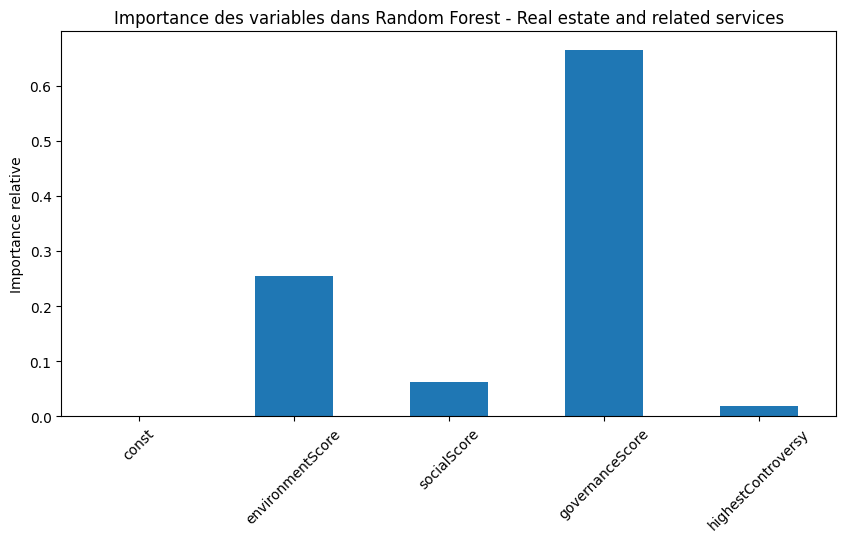

In [44]:

sector = data_final["global_industry"].unique()[2]
df_sector = data_final[data_final["global_industry"] == sector]


X_sector = df_sector[feature_cols]
X_sector = sm.add_constant(X_sector)


X_sector = X_sector.loc[:, ~X_sector.columns.duplicated()]

y_sector = df_sector["roe_num"]

if len(X_sector) > 10:

    X_train, X_test, y_train, y_test = train_test_split(X_sector, y_sector, test_size=0.2, random_state=42)


    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)

    if X_train.empty or y_train.empty:
        print(f"Aucune donnée suffisante pour le secteur {sector}. Skipping...")
    else:
        # Régression multiple
        model = sm.OLS(y_train, X_train).fit()
        print(f"\nRégression multiple pour le secteur {sector}:")
        print(model.summary())

        # LASSO
        lasso = Lasso(alpha=0.1, max_iter=10000).fit(X_train, y_train)
        print(f"\nCoefficients du modèle LASSO pour le secteur {sector}:")
        print(pd.Series(lasso.coef_, index=X_train.columns))

        # Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
        print(f"\nImportance des variables dans Random Forest pour le secteur {sector}:")
        print(rf_importances)

        # Visualisation des importances des variables
        plt.figure(figsize=(10, 5))
        rf_importances.plot(kind='bar')
        plt.title(f"Importance des variables dans Random Forest - {sector}")
        plt.ylabel("Importance relative")
        plt.xticks(rotation=45)
        plt.show()
else:
    print(f"Pas assez de données pour effectuer l'analyse sur le secteur {sector}.")



Régression multiple pour le secteur Consumer sectors (B2C):
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.8803
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.488
Time:                        15:29:47   Log-Likelihood:                -153.49
No. Observations:                  34   AIC:                             317.0
Df Residuals:                      29   BIC:                             324.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

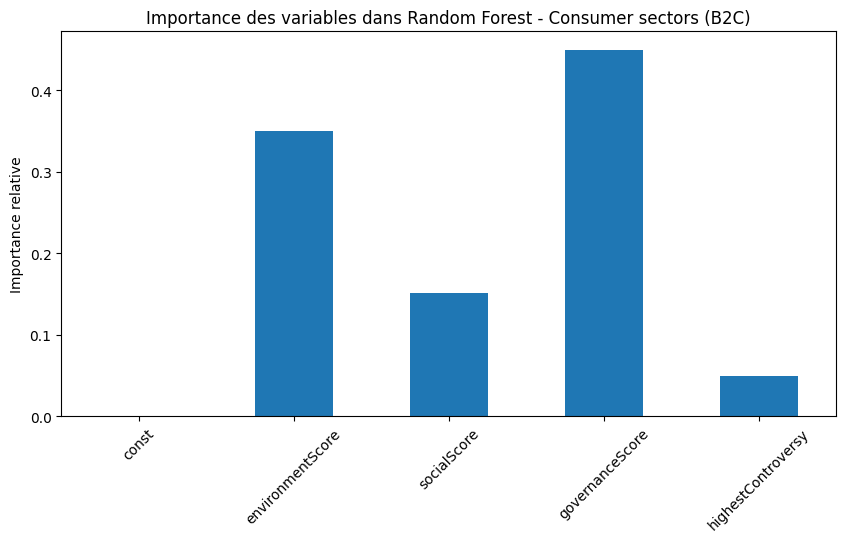

In [45]:

sector = data_final["global_industry"].unique()[3]
df_sector = data_final[data_final["global_industry"] == sector]

X_sector = df_sector[feature_cols]
X_sector = sm.add_constant(X_sector)


X_sector = X_sector.loc[:, ~X_sector.columns.duplicated()]


y_sector = df_sector["roe_num"]

if len(X_sector) > 10:

    X_train, X_test, y_train, y_test = train_test_split(X_sector, y_sector, test_size=0.2, random_state=42)


    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)

    if X_train.empty or y_train.empty:
        print(f"Aucune donnée suffisante pour le secteur {sector}. Skipping...")
    else:
        # Régression multiple
        model = sm.OLS(y_train, X_train).fit()
        print(f"\nRégression multiple pour le secteur {sector}:")
        print(model.summary())

        # LASSO
        lasso = Lasso(alpha=0.1, max_iter=10000).fit(X_train, y_train)
        print(f"\nCoefficients du modèle LASSO pour le secteur {sector}:")
        print(pd.Series(lasso.coef_, index=X_train.columns))

        # Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
        print(f"\nImportance des variables dans Random Forest pour le secteur {sector}:")
        print(rf_importances)

        # Visualisation des importances des variables
        plt.figure(figsize=(10, 5))
        rf_importances.plot(kind='bar')
        plt.title(f"Importance des variables dans Random Forest - {sector}")
        plt.ylabel("Importance relative")
        plt.xticks(rotation=45)
        plt.show()
else:
    print(f"Pas assez de données pour effectuer l'analyse sur le secteur {sector}.")



Régression multiple pour le secteur Industrial and manufacturing sectors:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     1.768
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.175
Time:                        15:29:47   Log-Likelihood:                -92.990
No. Observations:                  25   AIC:                             196.0
Df Residuals:                      20   BIC:                             202.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

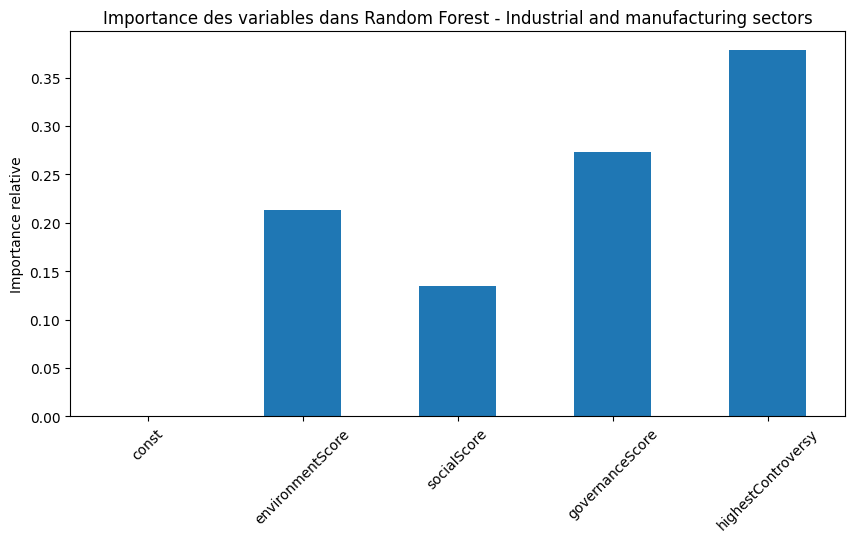

In [46]:

sector = data_final["global_industry"].unique()[4]
df_sector = data_final[data_final["global_industry"] == sector]
X_sector = df_sector[feature_cols]
X_sector = sm.add_constant(X_sector)
y_sector = df_sector["roe_num"]


if len(X_sector) > 10:
    X_train, X_test, y_train, y_test = train_test_split(X_sector, y_sector, test_size=0.2, random_state=42)

    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)


    if X_train.empty or y_train.empty:
        print(f"Aucune donnée suffisante pour le secteur {sector}. Skipping...")
    else:
        # Régression multiple
        model = sm.OLS(y_train, X_train).fit()
        print(f"\nRégression multiple pour le secteur {sector}:")
        print(model.summary())

        # LASSO
        lasso = Lasso(alpha=0.1).fit(X_train, y_train)
        print(f"\nCoefficients du modèle LASSO pour le secteur {sector}:")
        print(pd.Series(lasso.coef_, index=X_train.columns))

        # Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
        print(f"\nImportance des variables dans Random Forest pour le secteur {sector}:")
        print(rf_importances)


        plt.figure(figsize=(10, 5))
        rf_importances.plot(kind='bar')
        plt.title(f"Importance des variables dans Random Forest - {sector}")
        plt.ylabel("Importance relative")
        plt.xticks(rotation=45)
        plt.show()

else:
    print(f"Pas assez de données pour effectuer l'analyse sur le secteur {sector}.")




Régression multiple pour le secteur Transport and logistics:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     9.116
Date:                Wed, 05 Feb 2025   Prob (F-statistic):             0.0500
Time:                        15:29:47   Log-Likelihood:                -19.378
No. Observations:                   8   AIC:                             48.76
Df Residuals:                       3   BIC:                             49.15
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


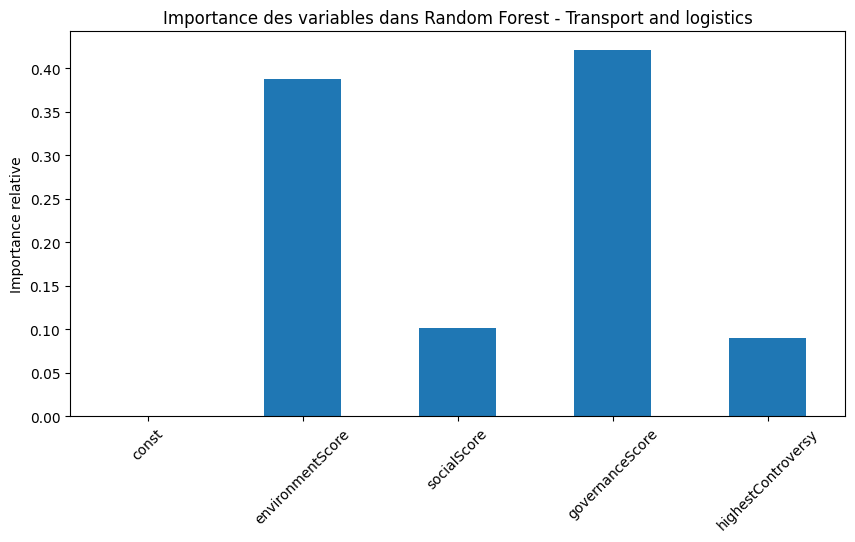

In [47]:

sector = data_final["global_industry"].unique()[5]
df_sector = data_final[data_final["global_industry"] == sector]
X_sector = df_sector[feature_cols]
X_sector = sm.add_constant(X_sector)
y_sector = df_sector["roe_num"]


if len(X_sector) > 10:
    X_train, X_test, y_train, y_test = train_test_split(X_sector, y_sector, test_size=0.2, random_state=42)


    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)

    if X_train.empty or y_train.empty:
        print(f"Aucune donnée suffisante pour le secteur {sector}. Skipping...")
    else:
        # Régression multiple
        model = sm.OLS(y_train, X_train).fit()
        print(f"\nRégression multiple pour le secteur {sector}:")
        print(model.summary())

        # LASSO
        lasso = Lasso(alpha=0.1).fit(X_train, y_train)
        print(f"\nCoefficients du modèle LASSO pour le secteur {sector}:")
        print(pd.Series(lasso.coef_, index=X_train.columns))

        # Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
        print(f"\nImportance des variables dans Random Forest pour le secteur {sector}:")
        print(rf_importances)


        plt.figure(figsize=(10, 5))
        rf_importances.plot(kind='bar')
        plt.title(f"Importance des variables dans Random Forest - {sector}")
        plt.ylabel("Importance relative")
        plt.xticks(rotation=45)
        plt.show()

else:
    print(f"Pas assez de données pour effectuer l'analyse sur le secteur {sector}.")




Régression multiple pour le secteur Financial sectors:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                 -0.224
Method:                 Least Squares   F-statistic:                    0.3135
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.863
Time:                        15:29:48   Log-Likelihood:                -63.354
No. Observations:                  16   AIC:                             136.7
Df Residuals:                      11   BIC:                             140.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


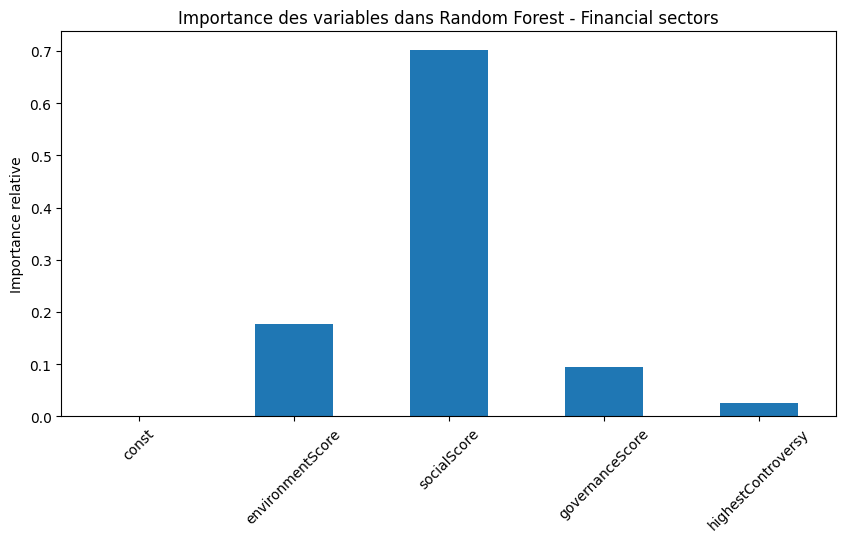

In [48]:

sector = data_final["global_industry"].unique()[6]
df_sector = data_final[data_final["global_industry"] == sector]
X_sector = df_sector[feature_cols]
X_sector = sm.add_constant(X_sector)
y_sector = df_sector["roe_num"]


if len(X_sector) > 10:
    X_train, X_test, y_train, y_test = train_test_split(X_sector, y_sector, test_size=0.2, random_state=42)


    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)

    if X_train.empty or y_train.empty:
        print(f"Aucune donnée suffisante pour le secteur {sector}. Skipping...")
    else:
        # Régression multiple
        model = sm.OLS(y_train, X_train).fit()
        print(f"\nRégression multiple pour le secteur {sector}:")
        print(model.summary())

        # LASSO
        lasso = Lasso(alpha=0.1).fit(X_train, y_train)
        print(f"\nCoefficients du modèle LASSO pour le secteur {sector}:")
        print(pd.Series(lasso.coef_, index=X_train.columns))

        # Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
        print(f"\nImportance des variables dans Random Forest pour le secteur {sector}:")
        print(rf_importances)


        plt.figure(figsize=(10, 5))
        rf_importances.plot(kind='bar')
        plt.title(f"Importance des variables dans Random Forest - {sector}")
        plt.ylabel("Importance relative")
        plt.xticks(rotation=45)
        plt.show()

else:
    print(f"Pas assez de données pour effectuer l'analyse sur le secteur {sector}.")




Régression multiple pour le secteur Technology sectors:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     2.513
Date:                Wed, 05 Feb 2025   Prob (F-statistic):             0.0586
Time:                        15:29:48   Log-Likelihood:                -180.04
No. Observations:                  41   AIC:                             370.1
Df Residuals:                      36   BIC:                             378.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

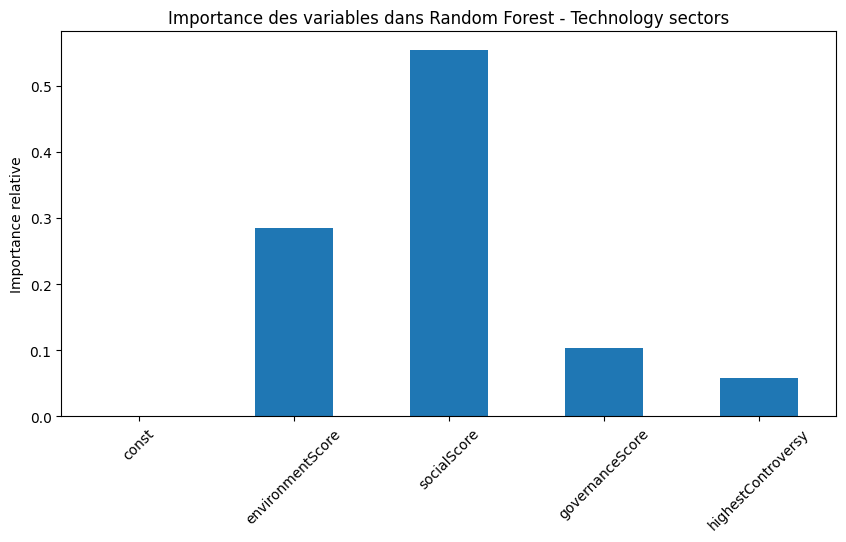

In [49]:

sector = data_final["global_industry"].unique()[7]  # Prend le premier secteur de la liste
df_sector = data_final[data_final["global_industry"] == sector]
X_sector = df_sector[feature_cols]
X_sector = sm.add_constant(X_sector)
y_sector = df_sector["roe_num"]

if len(X_sector) > 10:
    X_train, X_test, y_train, y_test = train_test_split(X_sector, y_sector, test_size=0.2, random_state=42)


    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)


    if X_train.empty or y_train.empty:
        print(f"Aucune donnée suffisante pour le secteur {sector}. Skipping...")
    else:
        # Régression multiple
        model = sm.OLS(y_train, X_train).fit()
        print(f"\nRégression multiple pour le secteur {sector}:")
        print(model.summary())

        # LASSO
        lasso = Lasso(alpha=0.1).fit(X_train, y_train)
        print(f"\nCoefficients du modèle LASSO pour le secteur {sector}:")
        print(pd.Series(lasso.coef_, index=X_train.columns))

        # Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
        print(f"\nImportance des variables dans Random Forest pour le secteur {sector}:")
        print(rf_importances)


        plt.figure(figsize=(10, 5))
        rf_importances.plot(kind='bar')
        plt.title(f"Importance des variables dans Random Forest - {sector}")
        plt.ylabel("Importance relative")
        plt.xticks(rotation=45)
        plt.show()

else:
    print(f"Pas assez de données pour effectuer l'analyse sur le secteur {sector}.")




Régression multiple pour le secteur Energy and natural resources:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1.278
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.409
Time:                        15:29:48   Log-Likelihood:                -34.816
No. Observations:                   9   AIC:                             79.63
Df Residuals:                       4   BIC:                             80.62
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


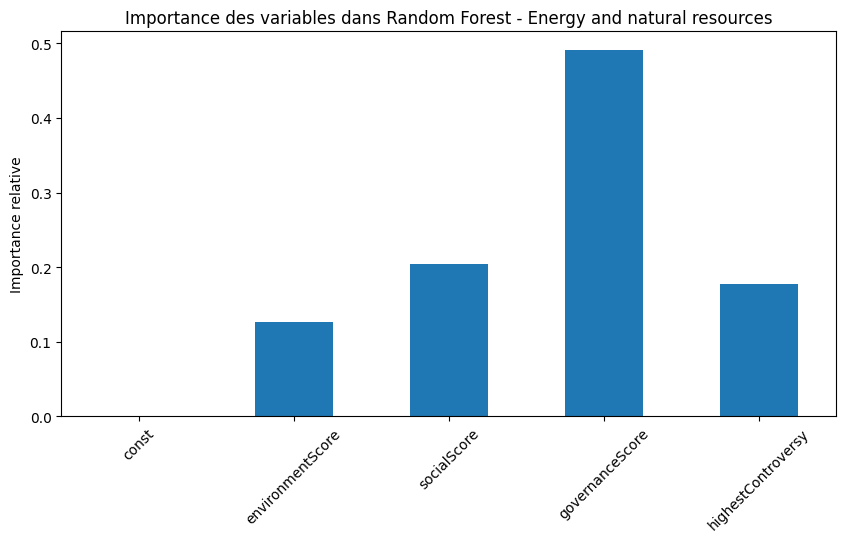

In [50]:

sector = data_final["global_industry"].unique()[8]  # Prend le premier secteur de la liste
df_sector = data_final[data_final["global_industry"] == sector]
X_sector = df_sector[feature_cols]
X_sector = sm.add_constant(X_sector)
y_sector = df_sector["roe_num"]


if len(X_sector) > 10:
    X_train, X_test, y_train, y_test = train_test_split(X_sector, y_sector, test_size=0.2, random_state=42)


    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)


    if X_train.empty or y_train.empty:
        print(f"Aucune donnée suffisante pour le secteur {sector}. Skipping...")
    else:
        # Régression multiple
        model = sm.OLS(y_train, X_train).fit()
        print(f"\nRégression multiple pour le secteur {sector}:")
        print(model.summary())

        # LASSO
        lasso = Lasso(alpha=0.1).fit(X_train, y_train)
        print(f"\nCoefficients du modèle LASSO pour le secteur {sector}:")
        print(pd.Series(lasso.coef_, index=X_train.columns))

        # Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
        print(f"\nImportance des variables dans Random Forest pour le secteur {sector}:")
        print(rf_importances)

        plt.figure(figsize=(10, 5))
        rf_importances.plot(kind='bar')
        plt.title(f"Importance des variables dans Random Forest - {sector}")
        plt.ylabel("Importance relative")
        plt.xticks(rotation=45)
        plt.show()

else:
    print(f"Pas assez de données pour effectuer l'analyse sur le secteur {sector}.")




Régression multiple pour le secteur Utilities:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                 -0.217
Method:                 Least Squares   F-statistic:                    0.5541
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.705
Time:                        15:29:49   Log-Likelihood:                -27.003
No. Observations:                  11   AIC:                             64.01
Df Residuals:                       6   BIC:                             66.00
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


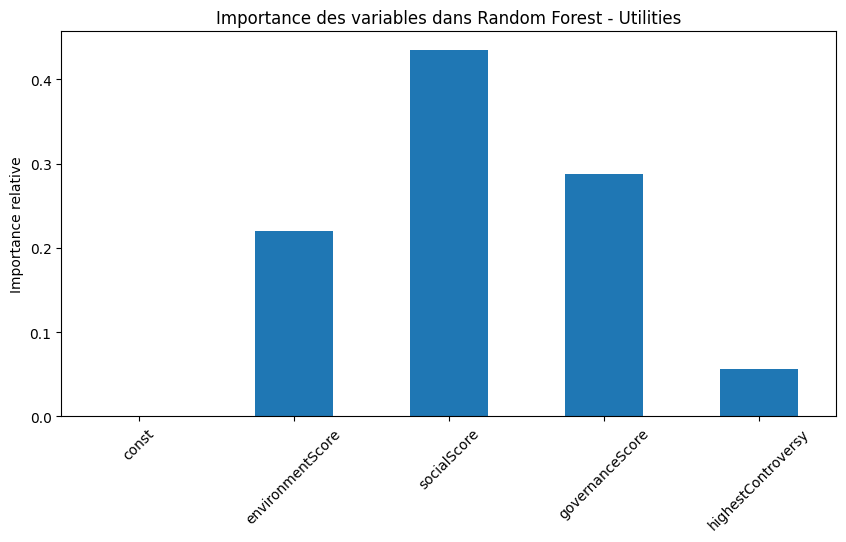

In [51]:

sector = data_final["global_industry"].unique()[9]
df_sector = data_final[data_final["global_industry"] == sector]
X_sector = df_sector[feature_cols]
X_sector = sm.add_constant(X_sector)
y_sector = df_sector["roe_num"]


if len(X_sector) > 10:
    X_train, X_test, y_train, y_test = train_test_split(X_sector, y_sector, test_size=0.2, random_state=42)


    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)


    if X_train.empty or y_train.empty:
        print(f"Aucune donnée suffisante pour le secteur {sector}. Skipping...")
    else:
        # Régression multiple
        model = sm.OLS(y_train, X_train).fit()
        print(f"\nRégression multiple pour le secteur {sector}:")
        print(model.summary())

        # LASSO
        lasso = Lasso(alpha=0.1).fit(X_train, y_train)
        print(f"\nCoefficients du modèle LASSO pour le secteur {sector}:")
        print(pd.Series(lasso.coef_, index=X_train.columns))

        # Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
        print(f"\nImportance des variables dans Random Forest pour le secteur {sector}:")
        print(rf_importances)


        plt.figure(figsize=(10, 5))
        rf_importances.plot(kind='bar')
        plt.title(f"Importance des variables dans Random Forest - {sector}")
        plt.ylabel("Importance relative")
        plt.xticks(rotation=45)
        plt.show()

else:
    print(f"Pas assez de données pour effectuer l'analyse sur le secteur {sector}.")



## Analyse par pays

In [55]:
continent_europe = data_final[data_final["continent"] == "Europe"]["country"].unique().tolist()
print(continent_europe)



['United Kingdom', 'Poland', 'France', 'Germany', 'Ireland', 'Belgium', 'Sweden', 'Switzerland', 'Luxembourg', 'Greece', 'Norway', 'Italy', 'Netherlands', 'Spain', 'Romania', 'Austria', 'Finland']


On va considerer 4 cas,  1)Etats-Unis, 2) Chine, 3)Japon, 4) Continent Européen


Régression multiple pour le pays/région United States of America:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.441
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.237
Time:                        16:06:48   Log-Likelihood:                -215.35
No. Observations:                  49   AIC:                             440.7
Df Residuals:                      44   BIC:                             450.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

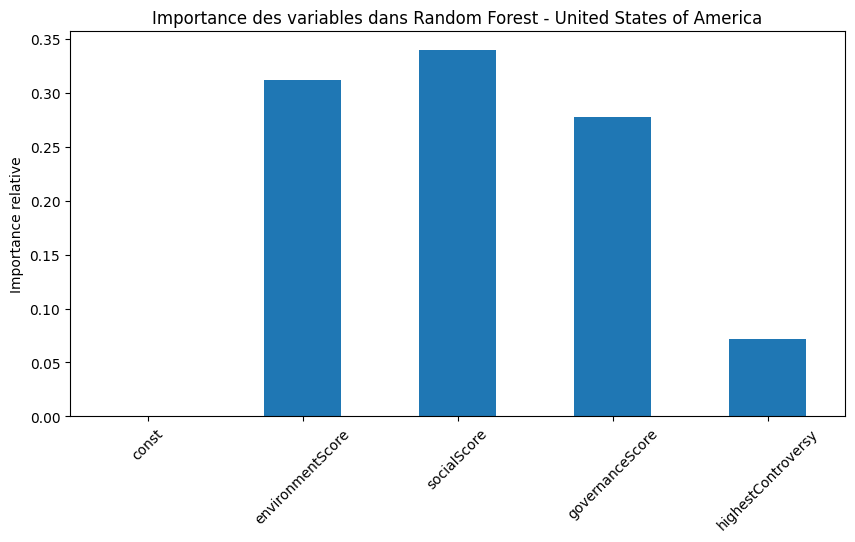


Régression multiple pour le pays/région China:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     2.666
Date:                Wed, 05 Feb 2025   Prob (F-statistic):             0.0619
Time:                        16:06:49   Log-Likelihood:                -167.21
No. Observations:                  41   AIC:                             342.4
Df Residuals:                      37   BIC:                             349.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.320e+02, tolerance: 1.018e+00
  model = cd_fast.enet_coordinate_descent(



Importance des variables dans Random Forest pour le pays/région China:
const                 0.000000
environmentScore      0.154308
socialScore           0.606630
governanceScore       0.186311
highestControversy    0.052751
dtype: float64


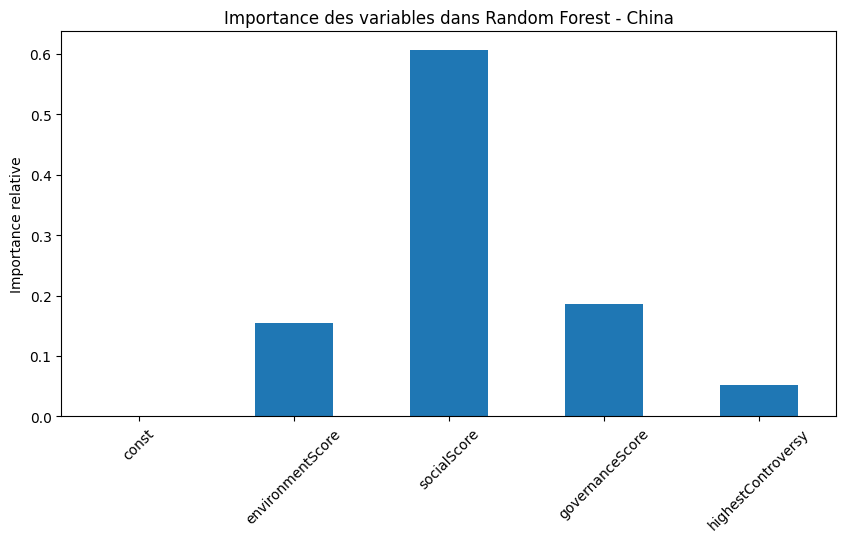


Régression multiple pour le pays/région Japan:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                 -0.105
Method:                 Least Squares   F-statistic:                    0.6184
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.620
Time:                        16:06:50   Log-Likelihood:                -47.780
No. Observations:                  13   AIC:                             103.6
Df Residuals:                       9   BIC:                             105.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)



Importance des variables dans Random Forest pour le pays/région Japan:
environmentScore      0.150600
socialScore           0.612648
governanceScore       0.236752
highestControversy    0.000000
dtype: float64


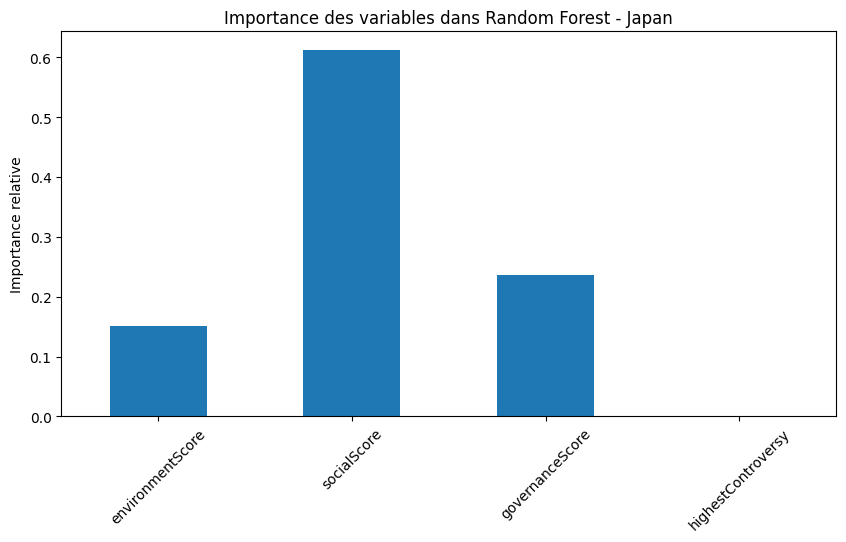


Régression multiple pour le pays/région United Kingdom:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:50   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

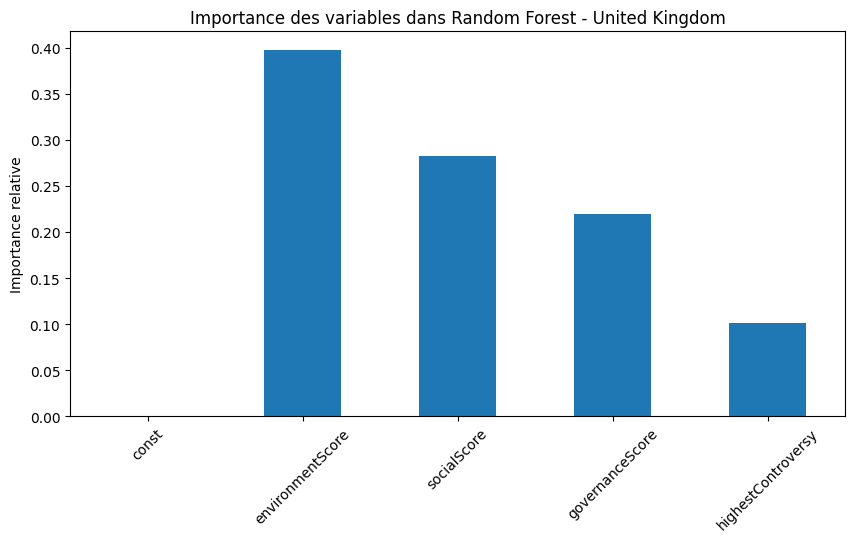


Régression multiple pour le pays/région Poland:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:51   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

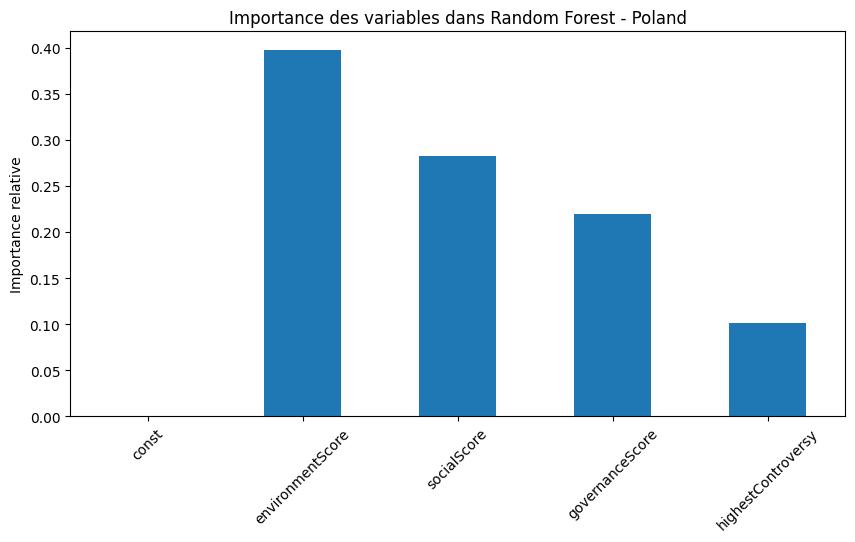


Régression multiple pour le pays/région France:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:51   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

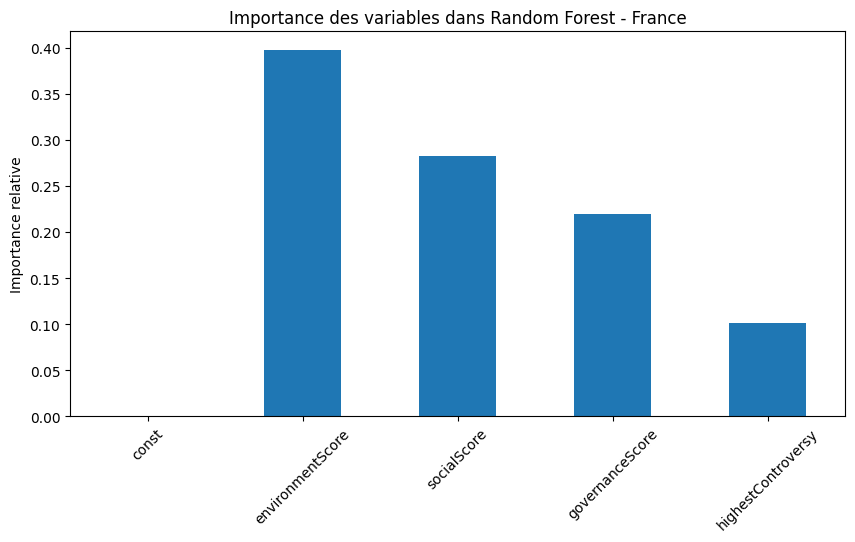


Régression multiple pour le pays/région Germany:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:52   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

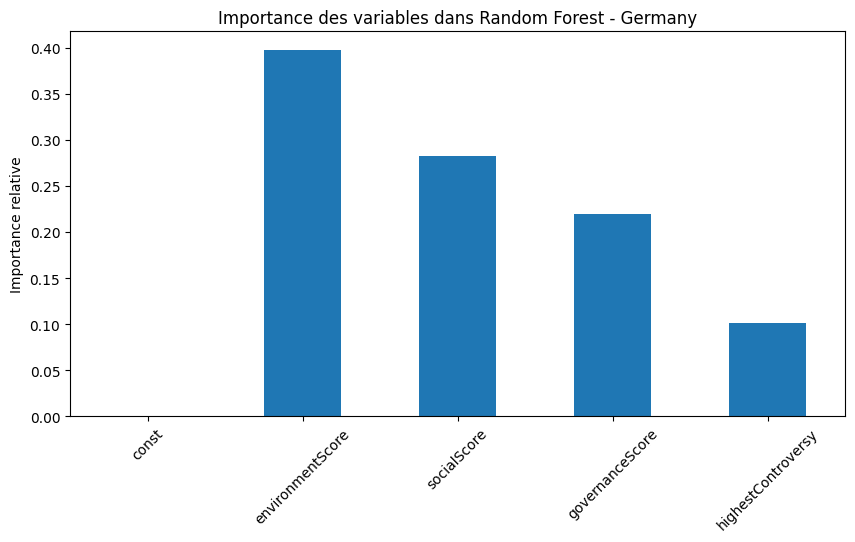


Régression multiple pour le pays/région Ireland:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:52   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

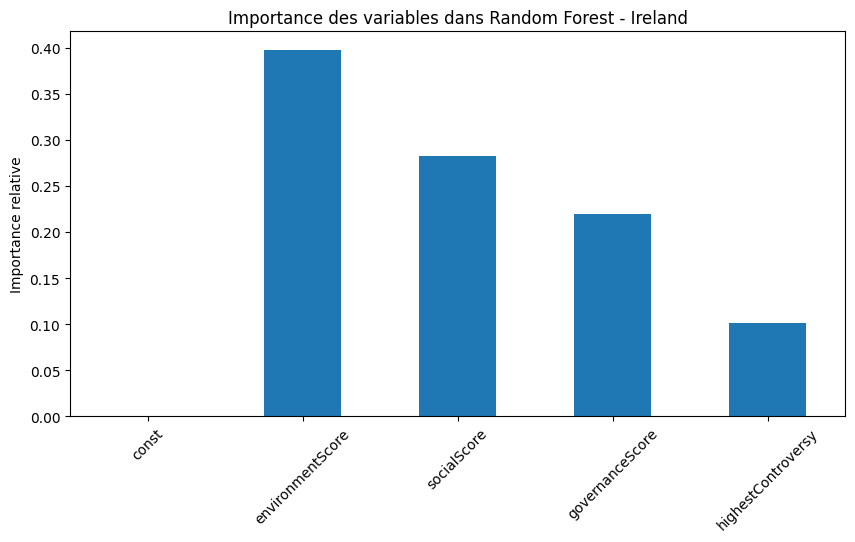


Régression multiple pour le pays/région Belgium:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:53   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

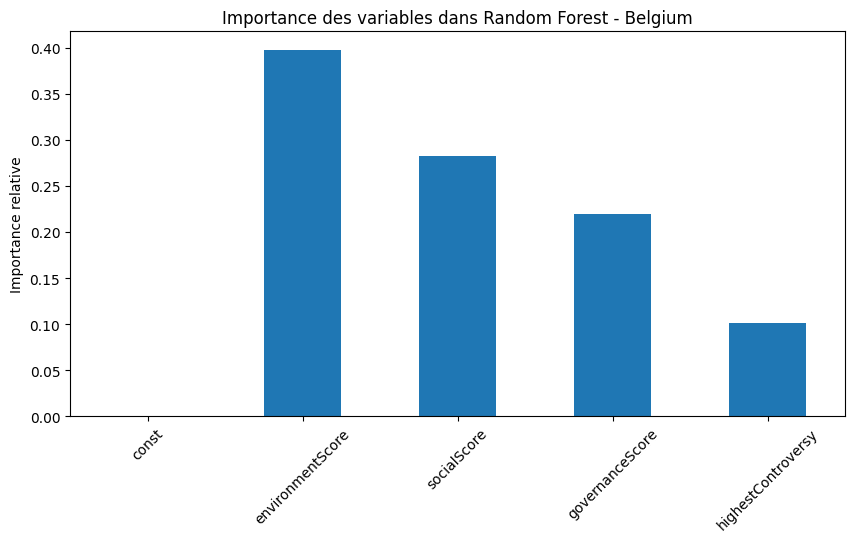


Régression multiple pour le pays/région Sweden:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:53   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

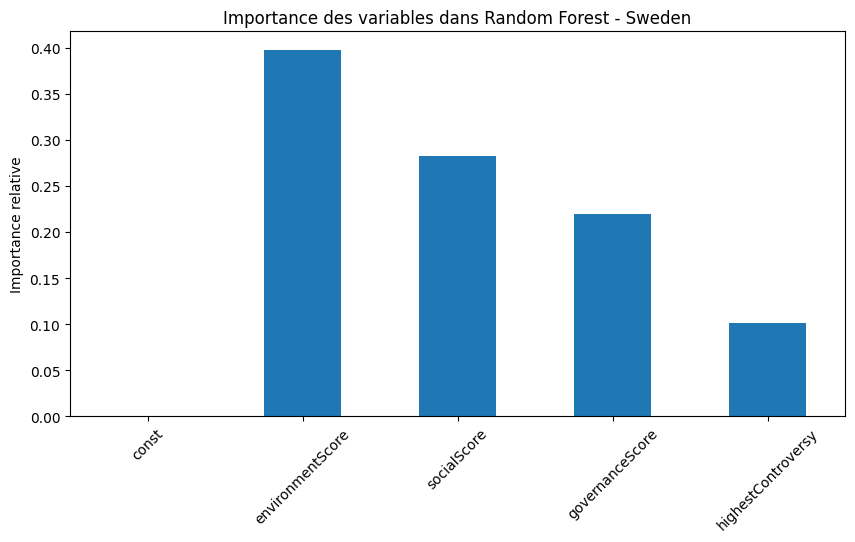


Régression multiple pour le pays/région Switzerland:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:54   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

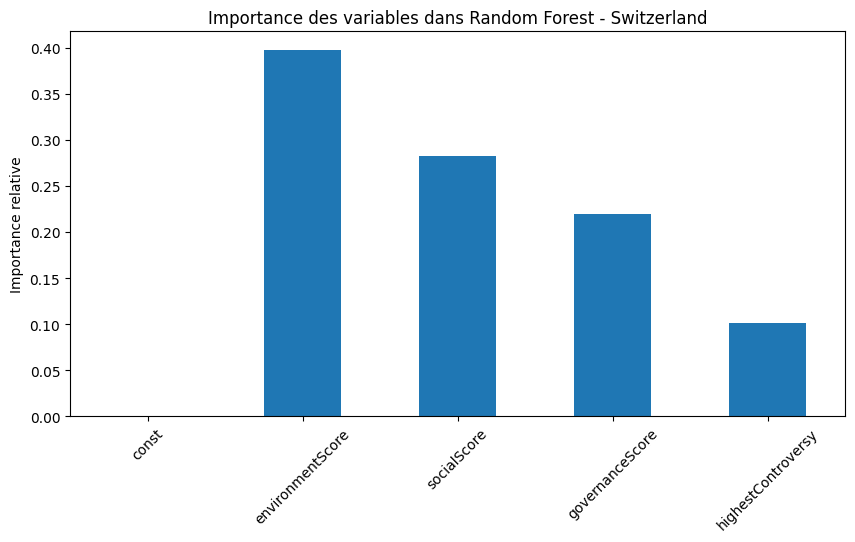


Régression multiple pour le pays/région Luxembourg:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:54   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

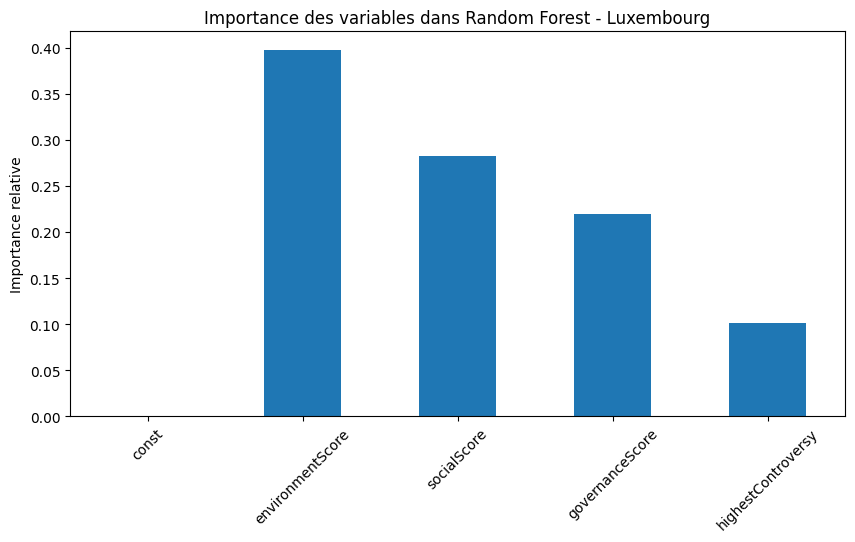


Régression multiple pour le pays/région Greece:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:54   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

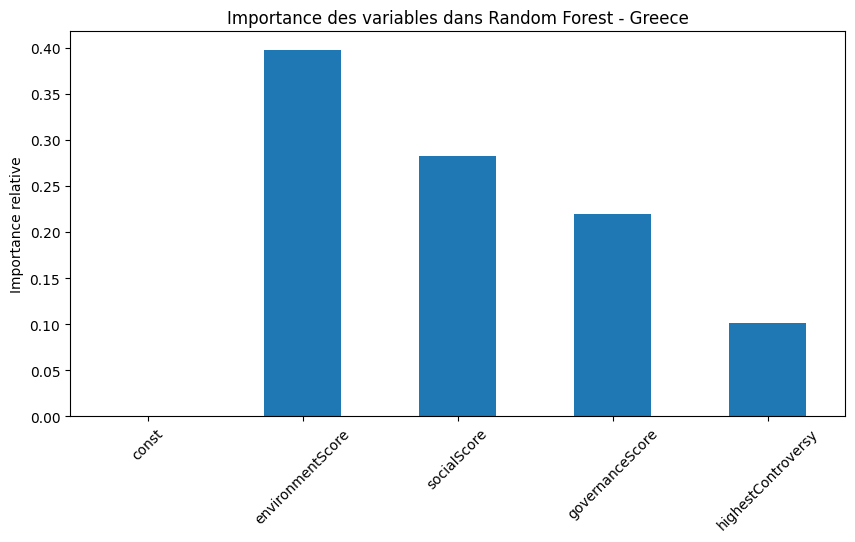


Régression multiple pour le pays/région Norway:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:55   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

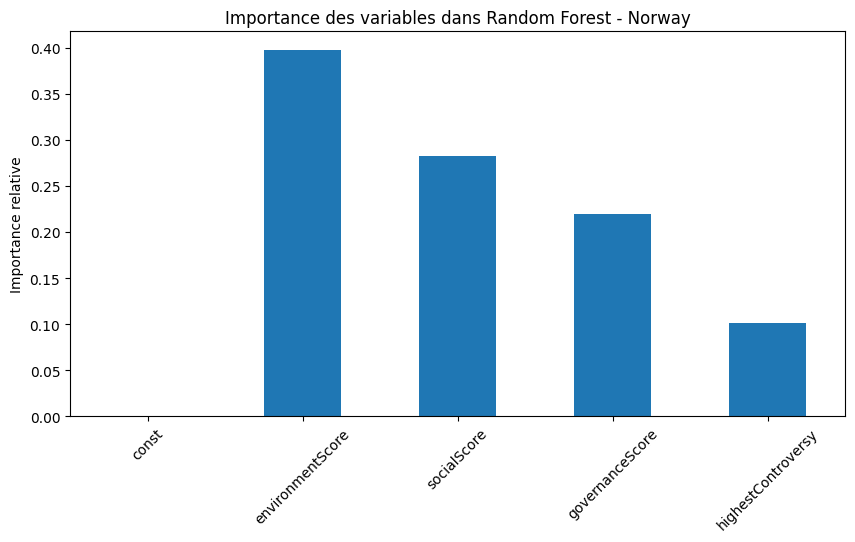


Régression multiple pour le pays/région Italy:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:55   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

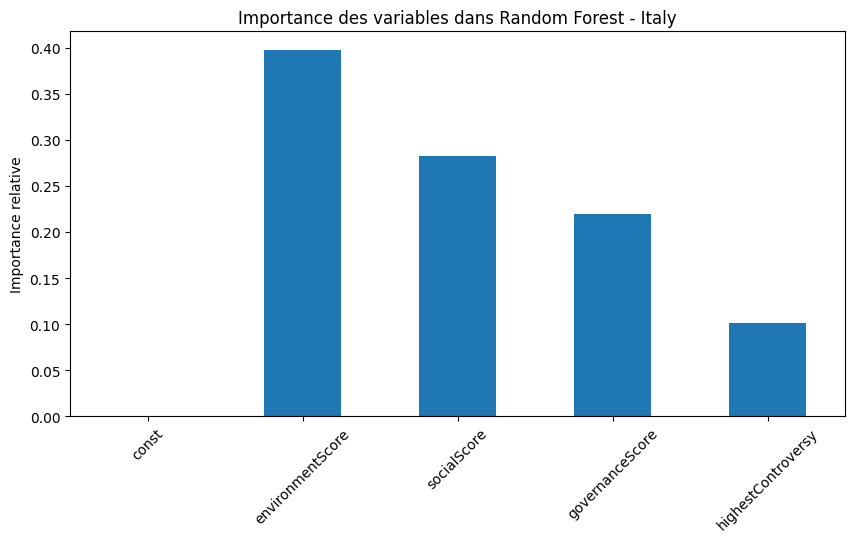


Régression multiple pour le pays/région Netherlands:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:56   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

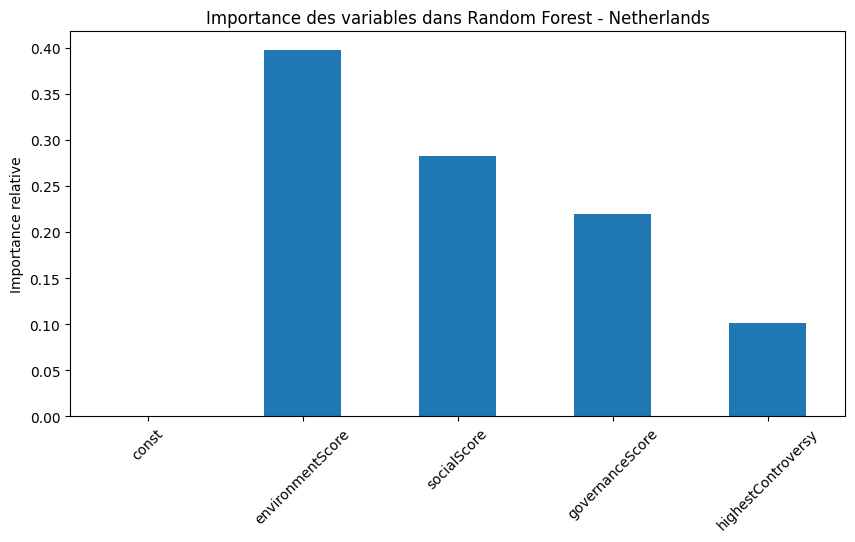


Régression multiple pour le pays/région Spain:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:56   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

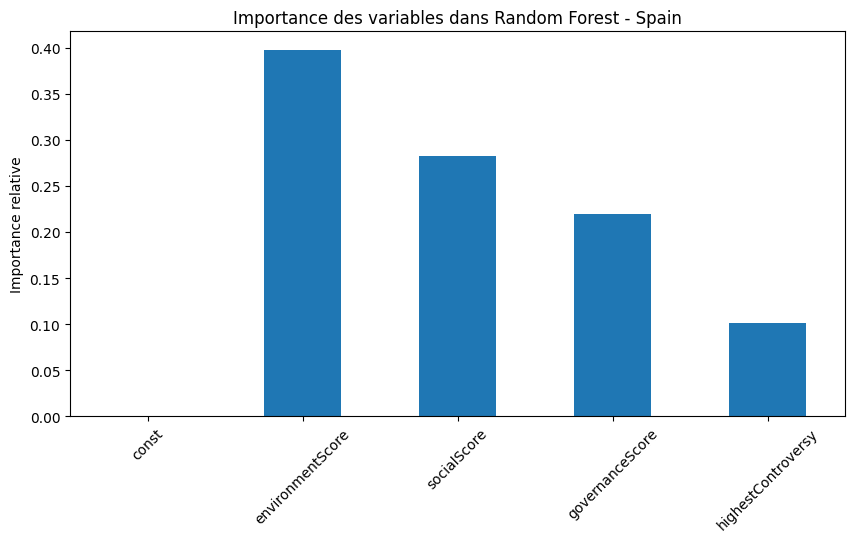


Régression multiple pour le pays/région Romania:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:56   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

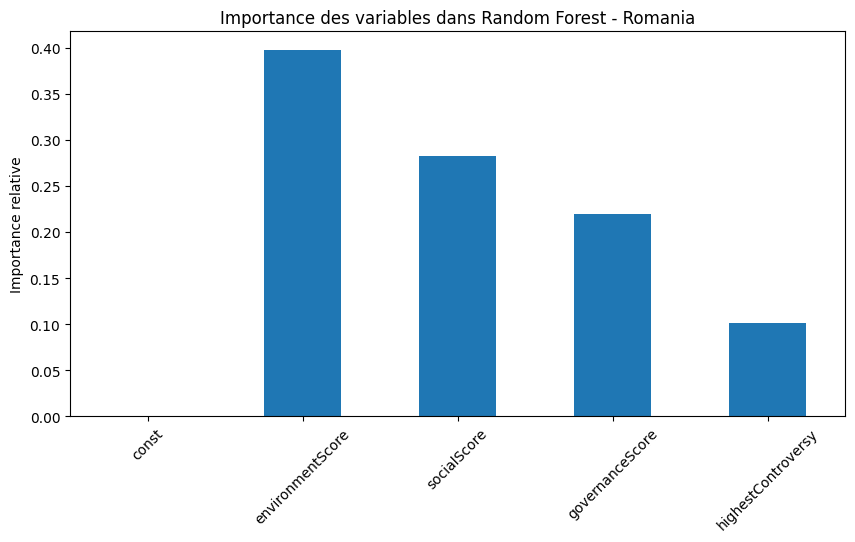


Régression multiple pour le pays/région Austria:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:57   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

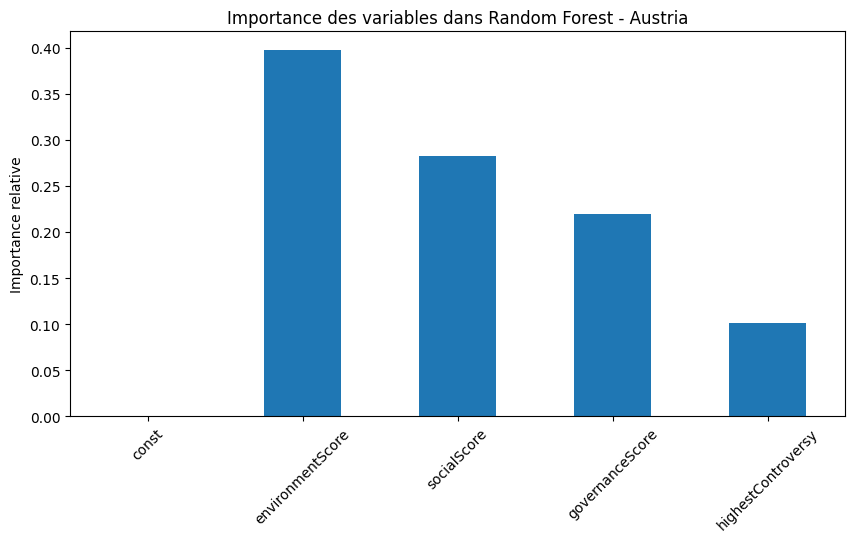


Régression multiple pour le pays/région Finland:
                            OLS Regression Results                            
Dep. Variable:                roe_num   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7861
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.537
Time:                        16:06:57   Log-Likelihood:                -382.58
No. Observations:                  90   AIC:                             775.2
Df Residuals:                      85   BIC:                             787.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

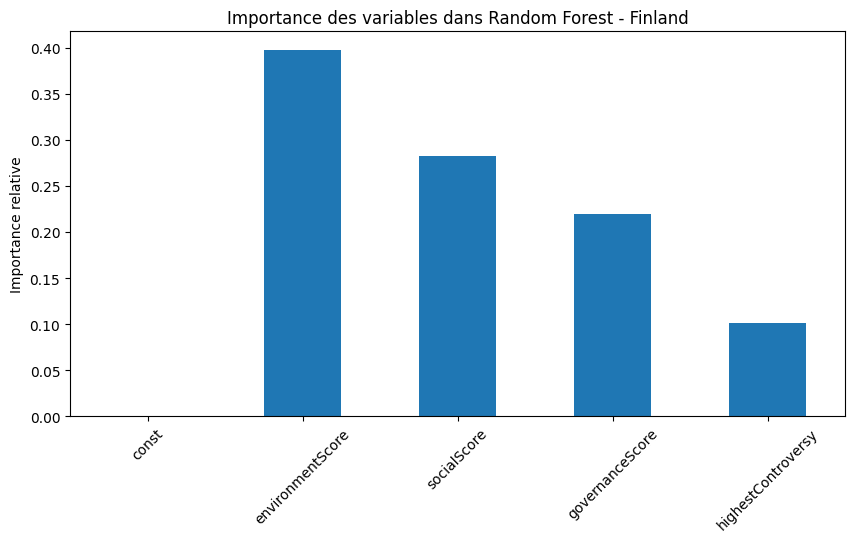

In [56]:
# Liste des régions à analyser
regions = ['United States of America', 'China', 'Japan',
           'United Kingdom', 'Poland', 'France', 'Germany', 'Ireland', 'Belgium', 'Sweden',
           'Switzerland', 'Luxembourg', 'Greece', 'Norway', 'Italy', 'Netherlands', 'Spain',
           'Romania', 'Austria', 'Finland']

# Appliquer les analyses par pays
for region in regions:
    df_region = data_final[(data_final["country"] == region) | (data_final["continent"] == "Europe" if region in continent_europe else False)]
    X_region = df_region[feature_cols]
    X_region = sm.add_constant(X_region)
    y_region = df_region["roe_num"]

    if len(X_region) > 10:
        X_train, X_test, y_train, y_test = train_test_split(X_region, y_region, test_size=0.2, random_state=42)


        X_train = X_train.select_dtypes(include=[np.number])
        X_test = X_test.select_dtypes(include=[np.number])
        y_train = y_train.astype(float)
        y_test = y_test.astype(float)


        if X_train.empty or y_train.empty:
            print(f"Aucune donnée suffisante pour le pays/région {region}. Skipping...")
        else:
            # Régression multiple
            model = sm.OLS(y_train, X_train).fit()
            print(f"\nRégression multiple pour le pays/région {region}:")
            print(model.summary())

            # LASSO
            lasso = Lasso(alpha=0.1).fit(X_train, y_train)
            print(f"\nCoefficients du modèle LASSO pour le pays/région {region}:")
            print(pd.Series(lasso.coef_, index=X_train.columns))

            # Random Forest
            rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
            rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
            print(f"\nImportance des variables dans Random Forest pour le pays/région {region}:")
            print(rf_importances)

            # Visualisation des importances des variables
            plt.figure(figsize=(10, 5))
            rf_importances.plot(kind='bar')
            plt.title(f"Importance des variables dans Random Forest - {region}")
            plt.ylabel("Importance relative")
            plt.xticks(rotation=45)
            plt.show()

    else:
        print(f"Pas assez de données pour effectuer l'analyse sur le pays/région {region}.")
